In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Understand Classification Types**

La classification binaire est un type de classification où l’on cherche à prédire si une donnée appartient à l’une de deux classes possibles. Par exemple, on peut vouloir déterminer si un e-mail est un spam ou non.

La classification multi-classes concerne les situations où chaque donnée appartient à une seule classe parmi plusieurs possibles. Par exemple, un modèle peut être entraîné pour reconnaître le type d’animal présent sur une image, comme un chat, un chien, un oiseau ou un lapin.

La classification multi-étiquettes diffère des deux précédentes, car une même donnée peut être associée à plusieurs classes simultanément. Par exemple, un article peut être classé à la fois dans les catégories « technologie », « éducation » et « intelligence artificielle ».

# **2. Set Up Your Python Environment and dataset**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.datasets import make_circles

samples = 1000
X, y = make_circles(samples,
                    noise = 0.03,
                    random_state = 42)

print('X : ', X)
print('\n')
print('y : ', y)

X :  [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]


y :  [1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1

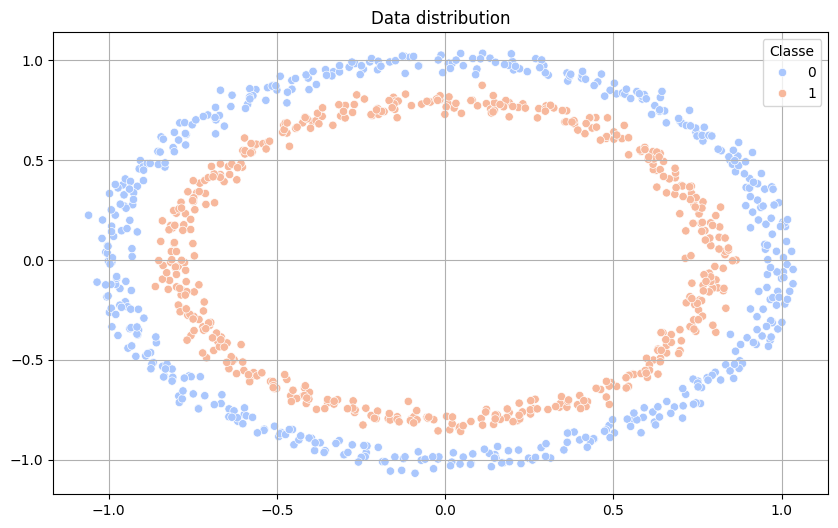

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue = y, palette = 'coolwarm')
plt.title("Data distribution")
plt.legend(title="Classe")
plt.grid(True)
plt.show()

# **3. Build a Basic Neural Network Model**

In [38]:
X.shape

(1000, 2)

In [39]:
Model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(2,), activation='sigmoid')
])

In [40]:
Model.compile(optimizer='sgd',
          loss = tf.losses.BinaryCrossentropy(from_logits=False),
          metrics=['accuracy'])

In [41]:
history = Model.fit(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5134 - loss: 0.7656


Le modèle affiche une accuracy de 53,82 % et une perte élevée, signe qu’il n’a pas appris correctement. Ses performances sont proches du hasard, ce qui indique qu’il est trop simple pour ce type de données non linéaires.

# **4. Improve the Model**

In [42]:
model2 = keras.Sequential([
    keras.layers.Dense(units=256, input_shape=(2,), activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [43]:
model2.compile(optimizer='adam',
          loss = tf.losses.BinaryCrossentropy(from_logits=False),
          metrics=['accuracy'])

In [44]:
history2 = model2.fit(X, y, epochs=10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4944 - loss: 0.6919
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4856 - loss: 0.6848
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5619 - loss: 0.6661
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6978 - loss: 0.6355
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7726 - loss: 0.5899
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9670 - loss: 0.4960
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9881 - loss: 0.3652
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.2481
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9997 - loss: 0.1560
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9932 - loss: 0.1127


Le modèle atteint une accuracy quasi parfaite dès les premières époques avec une perte très faible, preuve qu’il a très bien appris les données. Il faudra toutefois le tester sur des données séparées pour vérifier qu’il ne surapprend pas.

# **5. Visualize the Decision Boundary**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


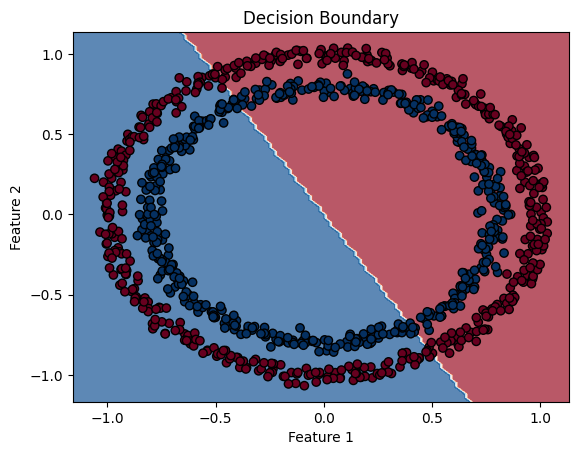

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


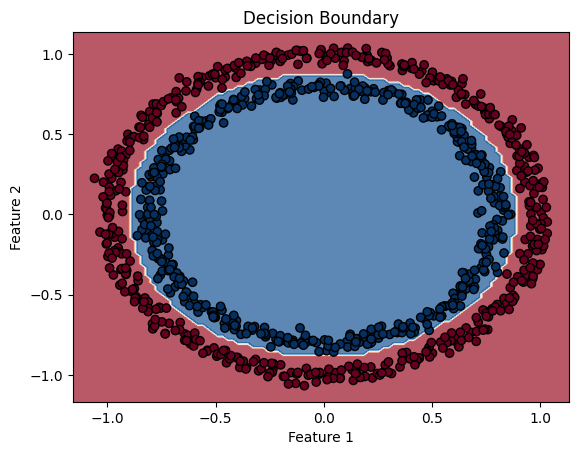

In [45]:
def plot_decision_boundary(model, X, y) :
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  grid = np.c_[xx.ravel(), yy.ravel()]
  preds = model.predict(grid)
  preds = tf.cast(preds > 0.5, tf.int32).numpy().reshape(xx.shape)
  plt.contourf(xx, yy, preds, cmap=plt.cm.RdBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
  plt.title("Decision Boundary")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.show()

plot_decision_boundary(Model, X, y)
plot_decision_boundary(model2, X, y)

e premier modèle ne parvient pas à séparer les classes correctement car il est trop rigide (linéaire).
Le deuxième modèle, plus profond et non linéaire, généralise très bien le motif des cercles et produit une frontière de décision parfaite.

# **7. Split Data into Training and Testing Sets**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model2.fit(X_train,
           y_train,
           epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9996 - loss: 0.0699
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0531
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0461
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0367
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0321
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0337
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0227
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0242
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.0267
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0169


In [50]:
model2.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9892 - loss: 0.0345  


[0.03428126871585846, 0.9950000047683716]

On divise les données en entraînement et test, puis on entraîne le modèle pendant 10 époques. L’accuracy atteint rapidement 100 % avec une perte faible. Sur le jeu de test, le modèle conserve une excellente performance (99,5 % de précision), ce qui montre une bonne généralisation

# **8. Evaluate and Visualize Final Model Performance**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


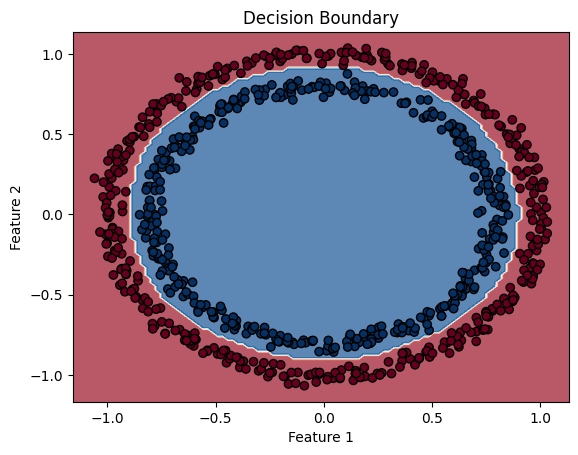

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


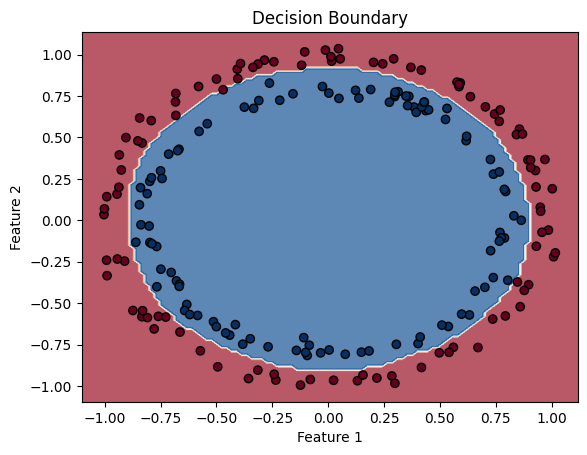

In [52]:
plot_decision_boundary(model2, X_train, y_train)
plot_decision_boundary(model2, X_test, y_test)

Le modèle généralise très bien : la frontière est quasiment identique entre l'entraînement et le test. Cela confirme que le réseau a appris la vraie structure des données sans overfitting.

# **9. Summarize Key Takeaways**

Ce projet a montré comment construire et améliorer un modèle de classification binaire. On a vu l’importance de visualiser les données et les frontières de décision pour comprendre le comportement du modèle. L’ajustement des hyperparamètres comme les couches, les fonctions d’activation et l’optimiseur s’est avéré essentiel pour obtenir de bonnes performances et assurer une bonne généralisation.